## Library

In [52]:
import pickle
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

## Data Preparation

### EDA

In [38]:
iris_df = pd.read_csv("./data/iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris_df = iris_df.drop(columns="Id")

In [40]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
iris_df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [42]:
iris_df[iris_df.duplicated()]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [43]:
iris_df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Analisis Univariat (Data Sepal)

<Axes: title={'center': 'Analisis Univariat (Data Sepal)'}, xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

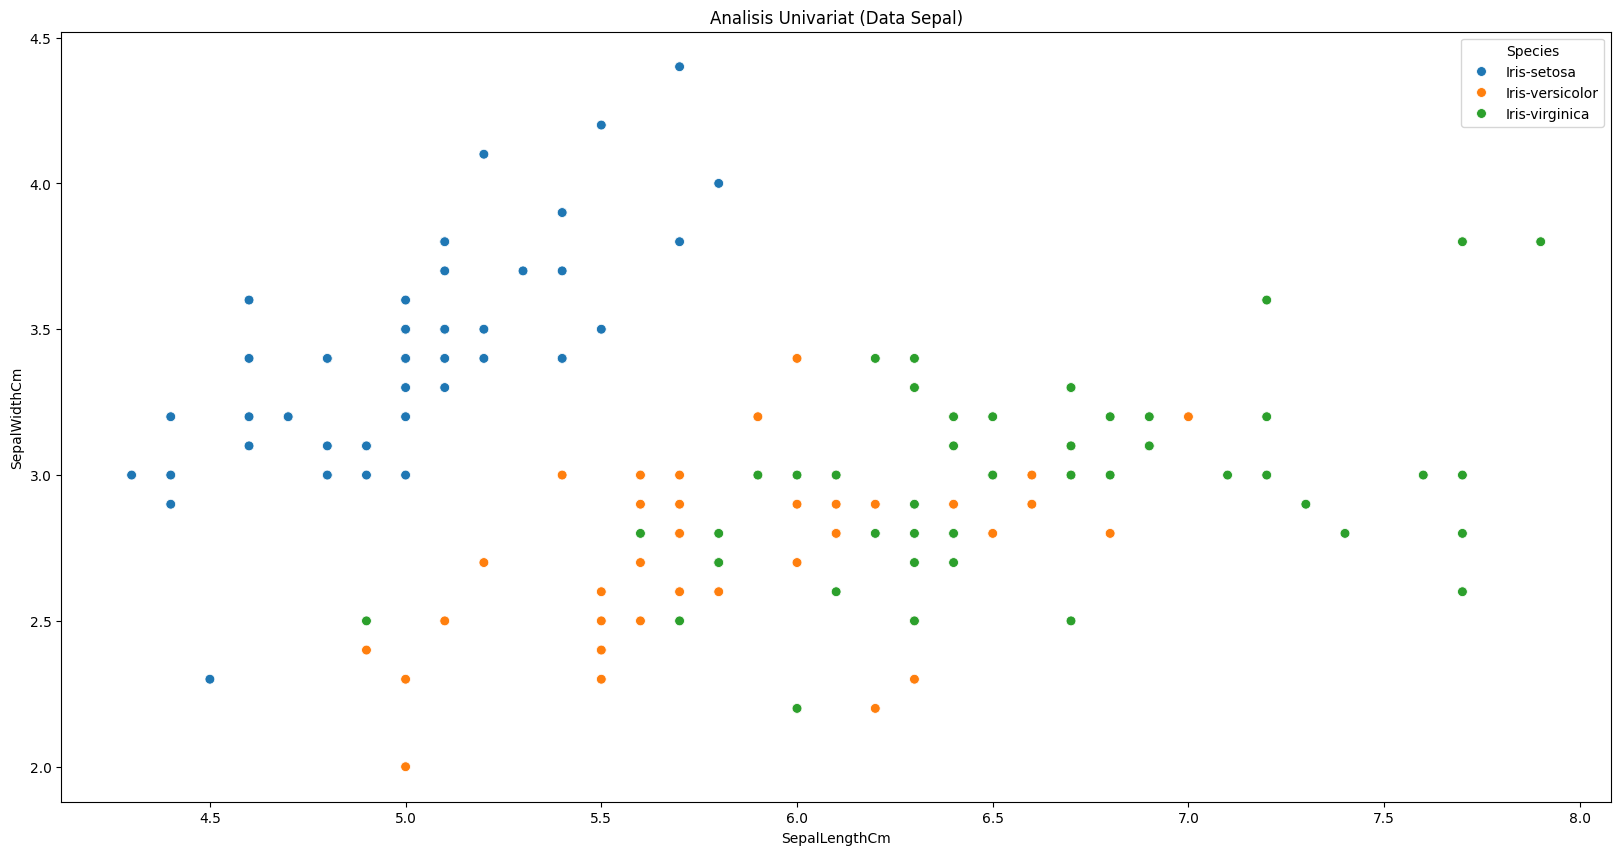

In [44]:
plt.figure(figsize=(20,10)) 
plt.title("Analisis Univariat (Data Sepal)") 
sns.scatterplot(x=iris_df['SepalLengthCm'],y=iris_df['SepalWidthCm'],hue =iris_df['Species'],s=50) 

### Analisis Univariat (Data Petal)

<Axes: title={'center': 'Analisis Univariat (Data Petal)'}, xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

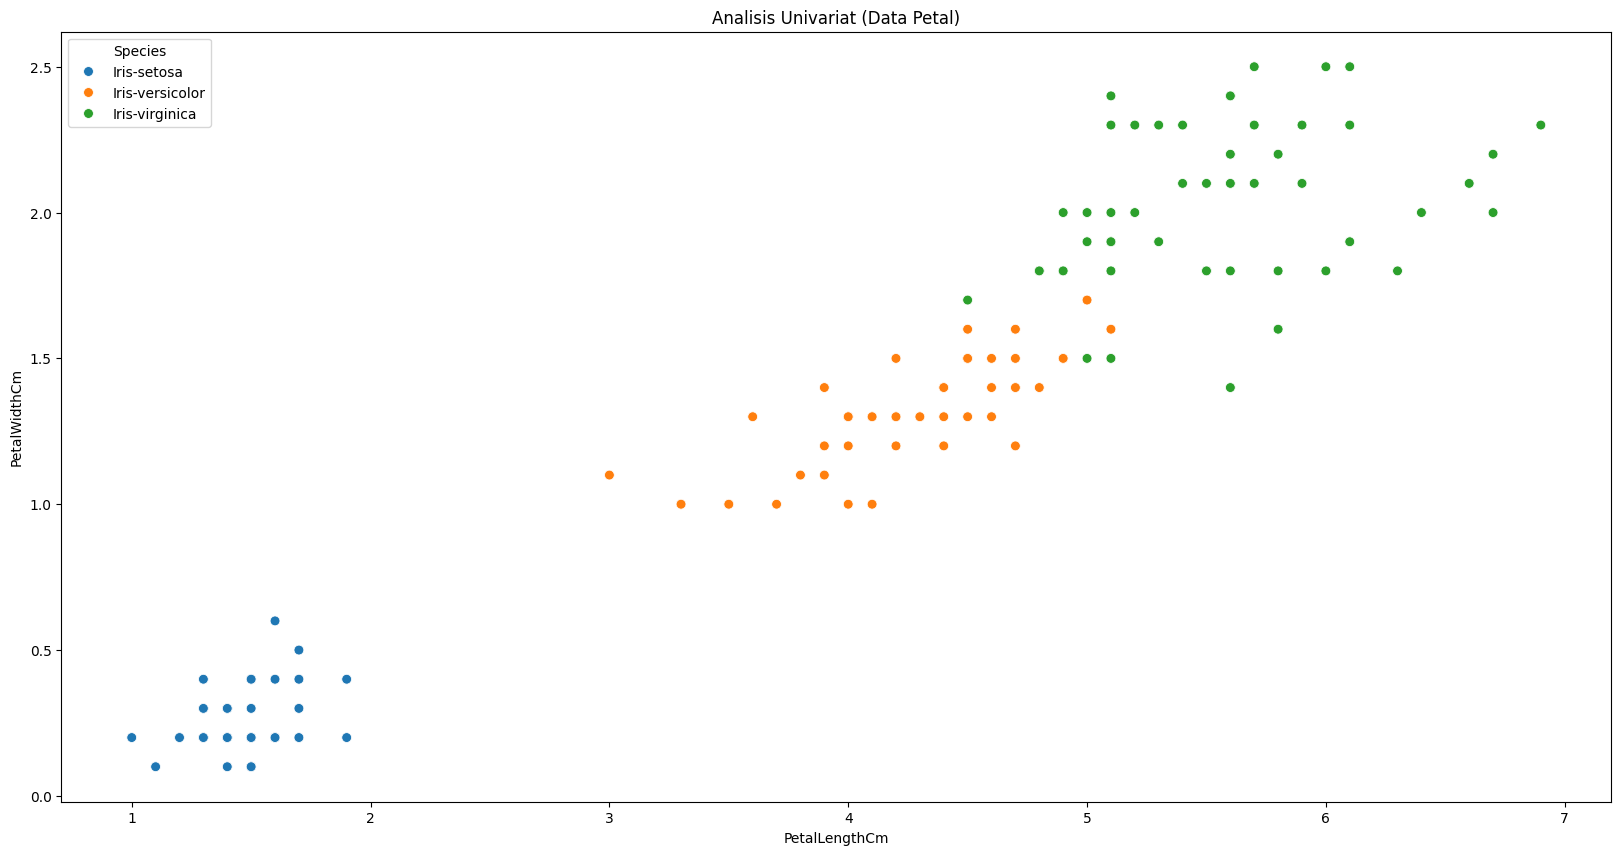

In [45]:
plt.figure(figsize=(20,10)) 
plt.title("Analisis Univariat (Data Petal)") 
sns.scatterplot(x=iris_df['PetalLengthCm'],y=iris_df['PetalWidthCm'],hue=iris_df['Species'],s=50)   

### Analisis Multivariat

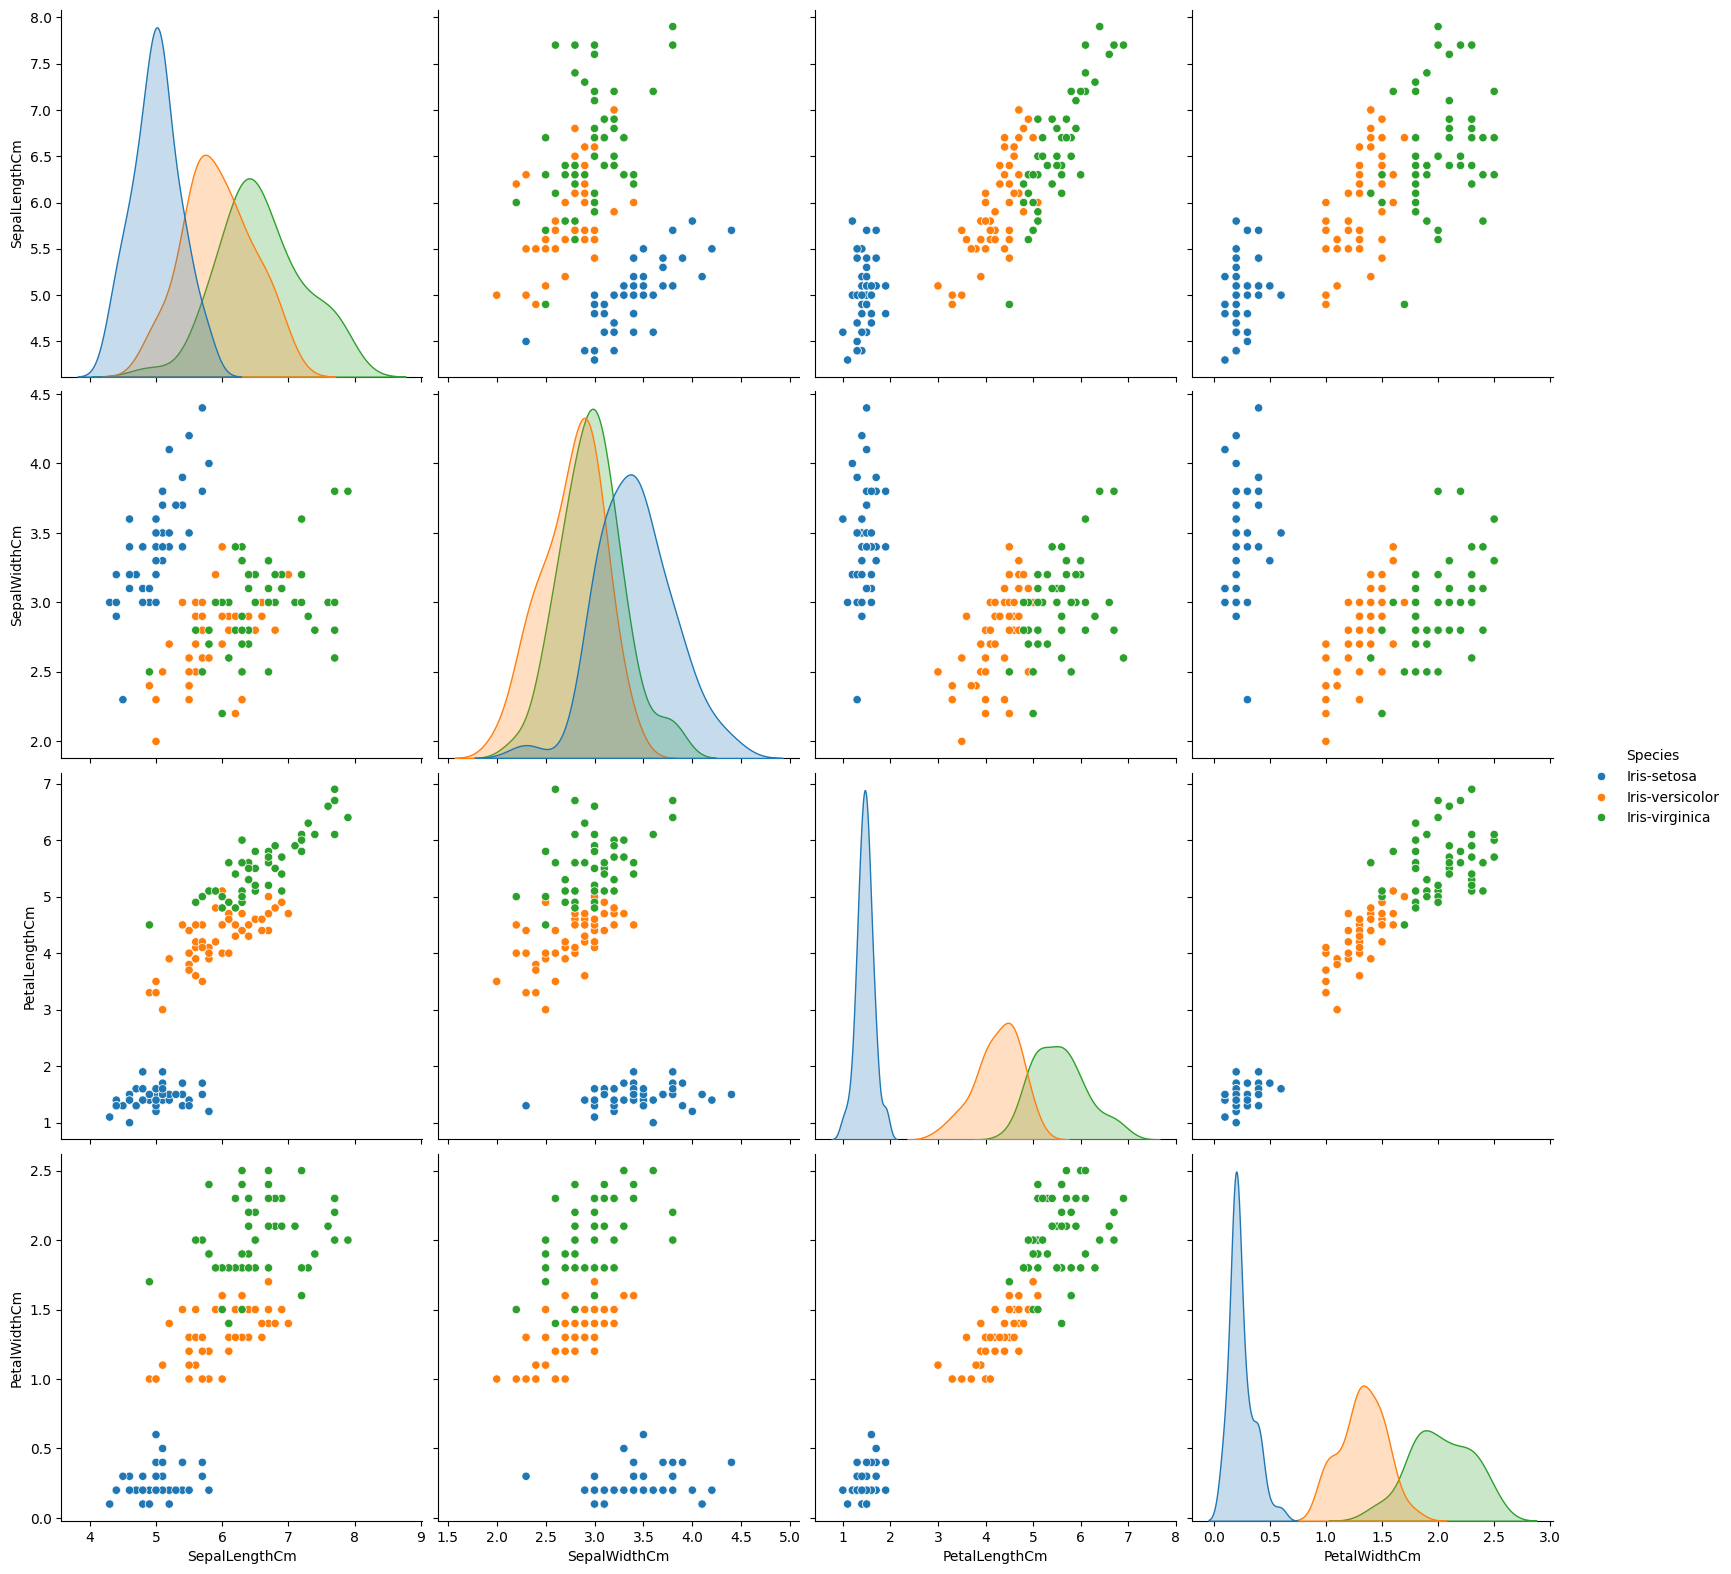

In [46]:
sns.pairplot(iris_df,hue="Species",height=4)

### Analisis Matriks Korelasi

[]

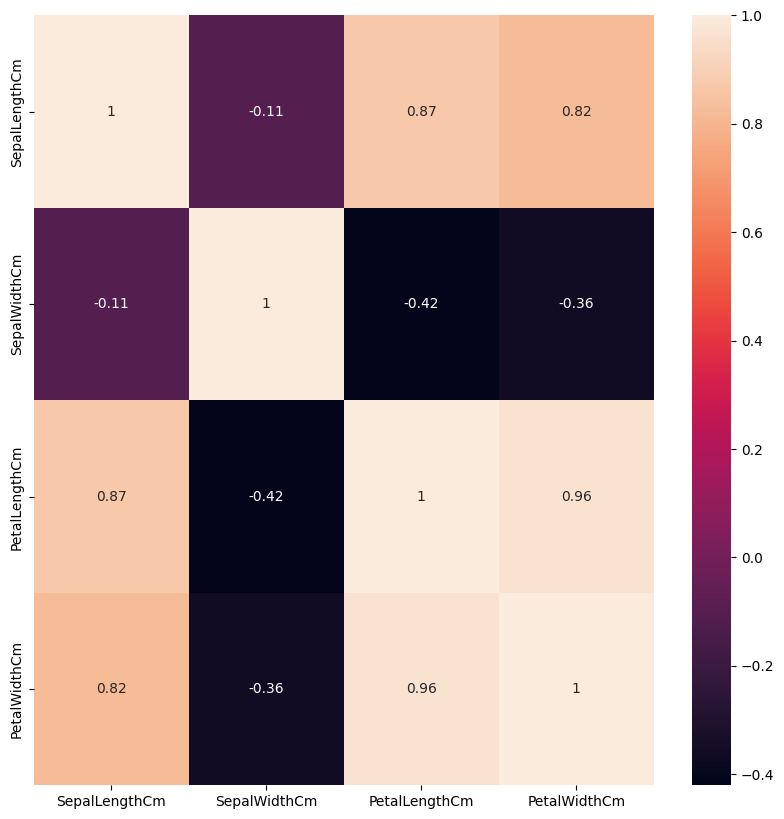

In [47]:
numeric_iris_df = iris_df.select_dtypes(include=[float, int])
plt.figure(figsize=(10,10)) 
sns.heatmap(numeric_iris_df.corr(),annot=True) 
plt.plot() 

## Feature Engineering

In [48]:
iris_df['RatioPetalLengthWidthCm'] = iris_df['PetalLengthCm'] / iris_df['PetalWidthCm']
iris_df.head(2)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,RatioPetalLengthWidthCm
0,5.1,3.5,1.4,0.2,Iris-setosa,7.0
1,4.9,3.0,1.4,0.2,Iris-setosa,7.0


## Splitting

In [49]:
X_train, X_test, y_train, y_test = train_test_split(iris_df.drop('Species', axis=1), iris_df['Species'], test_size=0.2, random_state=42)

## Feature Extraction

In [50]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Save Data

In [53]:
iris_df.to_csv('data/processed.csv')

with open("data/sc.pickle", "wb") as f:
    pickle.dump(sc, f)
    
train_data = {"x":X_train, "y":y_train}
test_data = {"x":X_test, "y":y_test}

with open("data/train_data.pickle", "wb") as f:
    pickle.dump(train_data, f)
    
with open("data/test_data.pickle", "wb") as f:
    pickle.dump(test_data, f)